In [53]:
using Pkg
Pkg.activate("/home/julisn/Codes/LadderDGA.jl")
using LadderDGA
using OffsetArrays
using LaTeXStrings
using Plots

  Activating project at `~/Codes/LadderDGA.jl`


In [54]:
gen_EPot_diff(result::λ_result) = result.EPot_p1 - result.EPot_p2
gen_PP_diff(result::λ_result) = result.PP_p1 - result.EPot_p2


cfg = "/home/julisn/Hamburg/Zwischenergebnisse/HLRN_2324/2D_lDGA_config.toml"

wp, mP, sP, env, kGridsStr = readConfig(cfg);
lDGAhelper = setup_LDGA(kGridsStr[1], mP, sP, env);


# ====================== lDGA ======================
bubble     = calc_bubble(:DMFT, lDGAhelper);
χm, γm = calc_χγ(:m, lDGAhelper, bubble);
χd, γd = calc_χγ(:d, lDGAhelper, bubble);
λ₀ = calc_λ0(bubble, lDGAhelper);

[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.0-0.0 of size 10
WARNING!!! k-grid sampling must contain zero-vector in order for convolutions to work!
DBG: NOT using diagonal terms in λ₀
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_m(1:201) = 0.4488, χLoc_d(1:201) = 0.0512
└ sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.24896673101550268 ?=? 0.2500109404375982 ?≈? 0.25001094043759825 ≟ 0.24999999999970046"
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.000395866447 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.000269858714 ≟ 0
DBG: NOT using diagonal terms in λ₀


In [2]:
res_dm_sc = run_sc(χm, γm, χd, γd, λ₀, lDGAhelper.mP.μ, lDGAhelper; type=:pre_dm, fit_μ=true, maxit=100, mixing=0.2, conv_abs=1e-8, trace=true);

DBG: λm=0.0782, λd=-1.3531, μ=1.0, n=1.0 // EPot_p1: 0.1048 , p2: 0.1048 :: 0.25 // 0.25
DBG: λm=0.0768, λd=1.0292, μ=1.0, n=1.0 // EPot_p1: 0.0964 , p2: 0.0964 :: 0.25 // 0.25
DBG: λm=0.0773, λd=-0.0448, μ=1.0, n=1.0 // EPot_p1: 0.0999 , p2: 0.0999 :: 0.25 // 0.25
DBG: λm=0.0772, λd=0.2374, μ=1.0, n=1.0 // EPot_p1: 0.099 , p2: 0.099 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.0868, μ=1.0, n=1.0 // EPot_p1: 0.0995 , p2: 0.0995 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.1182, μ=1.0, n=1.0 // EPot_p1: 0.0994 , p2: 0.0994 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.0946, μ=1.0, n=1.0 // EPot_p1: 0.0994 , p2: 0.0994 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.0971, μ=1.0, n=1.0 // EPot_p1: 0.0994 , p2: 0.0994 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.093, μ=1.0, n=1.0 // EPot_p1: 0.0994 , p2: 0.0994 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.0928, μ=1.0, n=1.0 // EPot_p1: 0.0994 , p2: 0.0994 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.092, μ=1.0, n=1.0 // EPot_p1: 0.0994 , p2: 0.0994 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.0919, μ=1.0, 

In [3]:
res_dm_sc = run_sc(χm, γm, χd, γd, λ₀, lDGAhelper.mP.μ, lDGAhelper; update_χ_tail=true, type=:pre_dm, fit_μ=true, maxit=100, mixing=0.2, conv_abs=1e-8, trace=true);

DBG: λm=0.0782, λd=-1.3531, μ=1.0, n=1.0 // EPot_p1: 0.1048 , p2: 0.1048 :: 0.25 // 0.25
DBG: λm=0.0768, λd=1.0292, μ=1.0, n=1.0 // EPot_p1: 0.0964 , p2: 0.0964 :: 0.25 // 0.25
DBG: λm=0.0773, λd=-0.0448, μ=1.0, n=1.0 // EPot_p1: 0.0999 , p2: 0.0999 :: 0.25 // 0.25
DBG: λm=0.0772, λd=0.2374, μ=1.0, n=1.0 // EPot_p1: 0.099 , p2: 0.099 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.0868, μ=1.0, n=1.0 // EPot_p1: 0.0995 , p2: 0.0995 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.1182, μ=1.0, n=1.0 // EPot_p1: 0.0994 , p2: 0.0994 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.0946, μ=1.0, n=1.0 // EPot_p1: 0.0994 , p2: 0.0994 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.0971, μ=1.0, n=1.0 // EPot_p1: 0.0994 , p2: 0.0994 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.093, μ=1.0, n=1.0 // EPot_p1: 0.0994 , p2: 0.0994 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.0928, μ=1.0, n=1.0 // EPot_p1: 0.0994 , p2: 0.0994 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.092, μ=1.0, n=1.0 // EPot_p1: 0.0994 , p2: 0.0994 :: 0.25 // 0.25
DBG: λm=0.0773, λd=0.0919, μ=1.0, 

In [72]:
_, νGrid, iωn_f = LadderDGA.LambdaCorrection.gen_νω_indices(χm, χd, lDGAhelper.mP, lDGAhelper.sP);
update_tail! = LadderDGA.update_tail!

χ_test1 = deepcopy(χm);
cs1 = abs(sum(χ_test1))

χ_λ!(χ_test1, 1.234)
reset!(χ_test1)

cs2 = abs(sum(χ_test1))

tail_bak = χ_test1.tail_c[3]
update_tail!(χ_test1, [0, 0, 2.345], iωn_f)
χ_λ!(χ_test1, 1.234)
reset!(χ_test1)
update_tail!(χ_test1, [0, 0, tail_bak], iωn_f)

cs3 = abs(sum(χ_test1))

tail_bak = χ_test1.tail_c[3]
χ_λ!(χ_test1, 1.234)
update_tail!(χ_test1, [0, 0, 2.345], iωn_f)
update_tail!(χ_test1, [0, 0, tail_bak], iωn_f)
reset!(χ_test1)
cs4 = abs(sum(χ_test1))

tail_bak = χ_test1.tail_c[3]
χ_λ!(χ_test1, 1.234)
update_tail!(χ_test1, [0, 0, 2.345], iωn_f)
reset!(χ_test1)
update_tail!(χ_test1, [0, 0, tail_bak], iωn_f)
cs5 = abs(sum(χ_test1))

tail_bak = χ_test1.tail_c[3]
update_tail!(χ_test1, [0, 0, 2.345], iωn_f)
χ_λ!(χ_test1, 1.234)
update_tail!(χ_test1, [0, 0, tail_bak], iωn_f)
reset!(χ_test1)
cs6 = abs(sum(χ_test1))

println(cs1, ", ", cs2, ", ", cs3, ", ", cs4, ", ", cs5, ", ", cs6, ", ")

85.98223989582037, 85.98223989582144, 85.9822398958214, 85.98223989582141, 85.98223989582141, 85.98223989582141, 


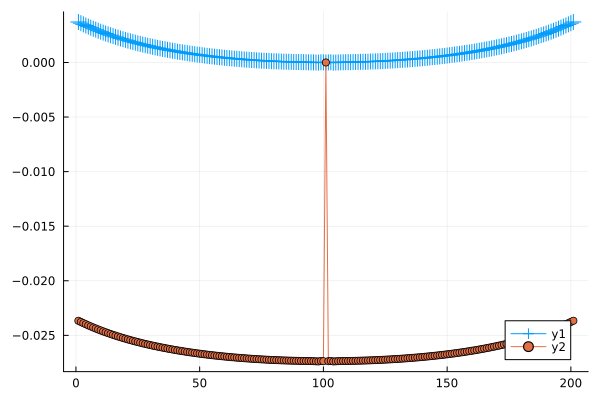

In [73]:
χ_test2 = deepcopy(χd);
plot(real(iωn_f .^ 2 .* χ_test2[1,:]), markershape=:auto, markersize=8)
update_tail!(χ_test2, [0, 0, -0.2], iωn_f)
plot!(real(iωn_f .^ 2 .* χ_test2[1,:]), markershape=:auto)
#hline!([tail_bak], label="DMFT")
#hline!([-0.2], label="test1")

In [62]:
iωn_f

201-element Vector{ComplexF64}:
 0.0 - 52.35987755982989im
 0.0 - 51.83627878423159im
 0.0 - 51.31268000863329im
 0.0 - 50.78908123303499im
 0.0 - 50.2654824574367im
 0.0 - 49.741883681838395im
 0.0 - 49.2182849062401im
 0.0 - 48.6946861306418im
 0.0 - 48.1710873550435im
 0.0 - 47.6474885794452im
 0.0 - 47.1238898038469im
 0.0 - 46.600291028248606im
 0.0 - 46.076692252650304im
     ⋮
 0.0 + 46.600291028248584im
 0.0 + 47.123889803846886im
 0.0 + 47.64748857944519im
 0.0 + 48.17108735504349im
 0.0 + 48.69468613064178im
 0.0 + 49.21828490624008im
 0.0 + 49.74188368183838im
 0.0 + 50.26548245743668im
 0.0 + 50.78908123303497im
 0.0 + 51.31268000863327im
 0.0 + 51.836278784231574im
 0.0 + 52.359877559829876im

In [66]:
2im .* (-lDGAhelper.sP.n_iω:lDGAhelper.sP.n_iω) .* π ./ lDGAhelper.mP.β

0.0 - 52.35987755982989im:0.0 + 0.5235987755982988im:0.0 + 52.359877559829876im